In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

In [2]:
HD = pd.read_csv('data_set/heart.csv')


# Observing and Data Cleaning 

In [3]:
HD.shape
print('There are %i rows and %i columns in Heart Disease data set' % HD.shape) 

There are 303 rows and 14 columns in Heart Disease data set


In [4]:
print('Now we will go through the data for cleaning')
HD.info()

Now we will go through the data for cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
HD.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Dictionary

`age`: age in years

`sex`: (1 = male; 0 = female)

`cp`: chest pain type 
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

`trestbps`: resting blood pressure (in mm Hg on admission to the hospital)

`thalach`: maximum heart rate achieved

`chol`: serum cholestoral in mg/dl

`fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

`restecg`: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

`thalach`: maximum heart rate achieved

`exang`: exercise induced angina (1 = yes; 0 = no)

`oldpeak` = ST depression induced by exercise relative to rest

`slope`: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping

`ca`: number of major vessels (0-3) colored by flourosopy

`thal(thalassemia)`: blood disorder related to abnormal or inadequate amounts of hemoglobin

- 0 maps to null in the original dataset
- 1 maps to 6 in the original dataset. This means that a fixed defect was found.
- 2 maps to 3 in the original dataset. This means that the blood flow was normal.
- 3 maps to 7 in the original dataset. This means that a reversible defect

`target`: Heart disease (0 = no, 1 = yes)





In [6]:
# Rename coulmun to be more clear
HD.columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'number_major_vessels', 'thalassemia', 'target']

1- Check how many missing value we have 

In [7]:
HD.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
number_major_vessels       0
thalassemia                0
target                     0
dtype: int64

We have no missing value but we should check if the data match the description 

In [8]:
HD.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exercise_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


As its clear from the describe all the data met the  data description exept for number_major_vessels and thalassemia

For number_major_vessels number of major vessels (0-3) but we have 5 rows with number of vessels =4 then its not clean and we will remove it

In [9]:
#not included(not clean)
HD[HD.number_major_vessels==4]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [10]:
HD = HD[HD.number_major_vessels != 4]
HD.describe().T


,count,mean,std,min,25%,50%,75%,max
age,298.0,54.510067,9.030526,29.0,48.0,56.0,61.00,77.0
sex,298.0,0.677852,0.468085,0.0,0.0,1.0,1.00,1.0
chest_pain_type,298.0,0.959732,1.033963,0.0,0.0,1.0,2.00,3.0
resting_blood_pressure,298.0,131.580537,17.669293,94.0,120.0,130.0,140.00,200.0
cholesterol,298.0,246.906040,51.893097,126.0,211.0,241.5,275.00,564.0
fasting_blood_sugar,298.0,0.147651,0.355350,0.0,0.0,0.0,0.00,1.0
rest_ecg,298.0,0.523490,0.526521,0.0,0.0,1.0,1.00,2.0
max_heart_rate_achieved,298.0,149.466443,22.983830,71.0,133.0,152.5,165.75,202.0
exercise_induced_angina,298.0,0.328859,0.470589,0.0,0.0,0.0,1.00,1.0
st_depression,298.0,1.055369,1.164162,0.0,0.0,0.8,1.60,6.2


In [11]:
HD.shape
print('Now there are %i rows and %i columns in Heart Disease data set\n' % HD.shape) 

Now there are 298 rows and 14 columns in Heart Disease data set



For thalassemia its show me for values from (0-3)و data mapped to 1,2,3 and 0 mapped to null value in the original data set then is not clean then we will drop it. 

In [12]:
#not clean
HD[HD.thalassemia==0]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [13]:
HD = HD[HD.thalassemia != 0]
HD.describe().T


,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
sex,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
chest_pain_type,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fasting_blood_sugar,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
rest_ecg,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exercise_induced_angina,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


In [14]:
HD.shape
print('Now there are %i rows and %i columns in Heart Disease data set' % HD.shape) 

Now there are 296 rows and 14 columns in Heart Disease data set


Check if we have duplicated rows 

In [15]:
HD.duplicated()
duplicateDFRow = HD[HD.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [age, sex, chest_pain_type, resting_blood_pressure, cholesterol, fasting_blood_sugar, rest_ecg, max_heart_rate_achieved, exercise_induced_angina, st_depression, st_slope, number_major_vessels, thalassemia, target]
Index: []


In [16]:
HD.duplicated().sum()


0

In [17]:
HD[HD.duplicated()]


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,number_major_vessels,thalassemia,target


There is no duplicated data then now our data is clean and our data is ready for visualization

# Visualization

1-Histogram of Each Columns in our data set.

C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\sony\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

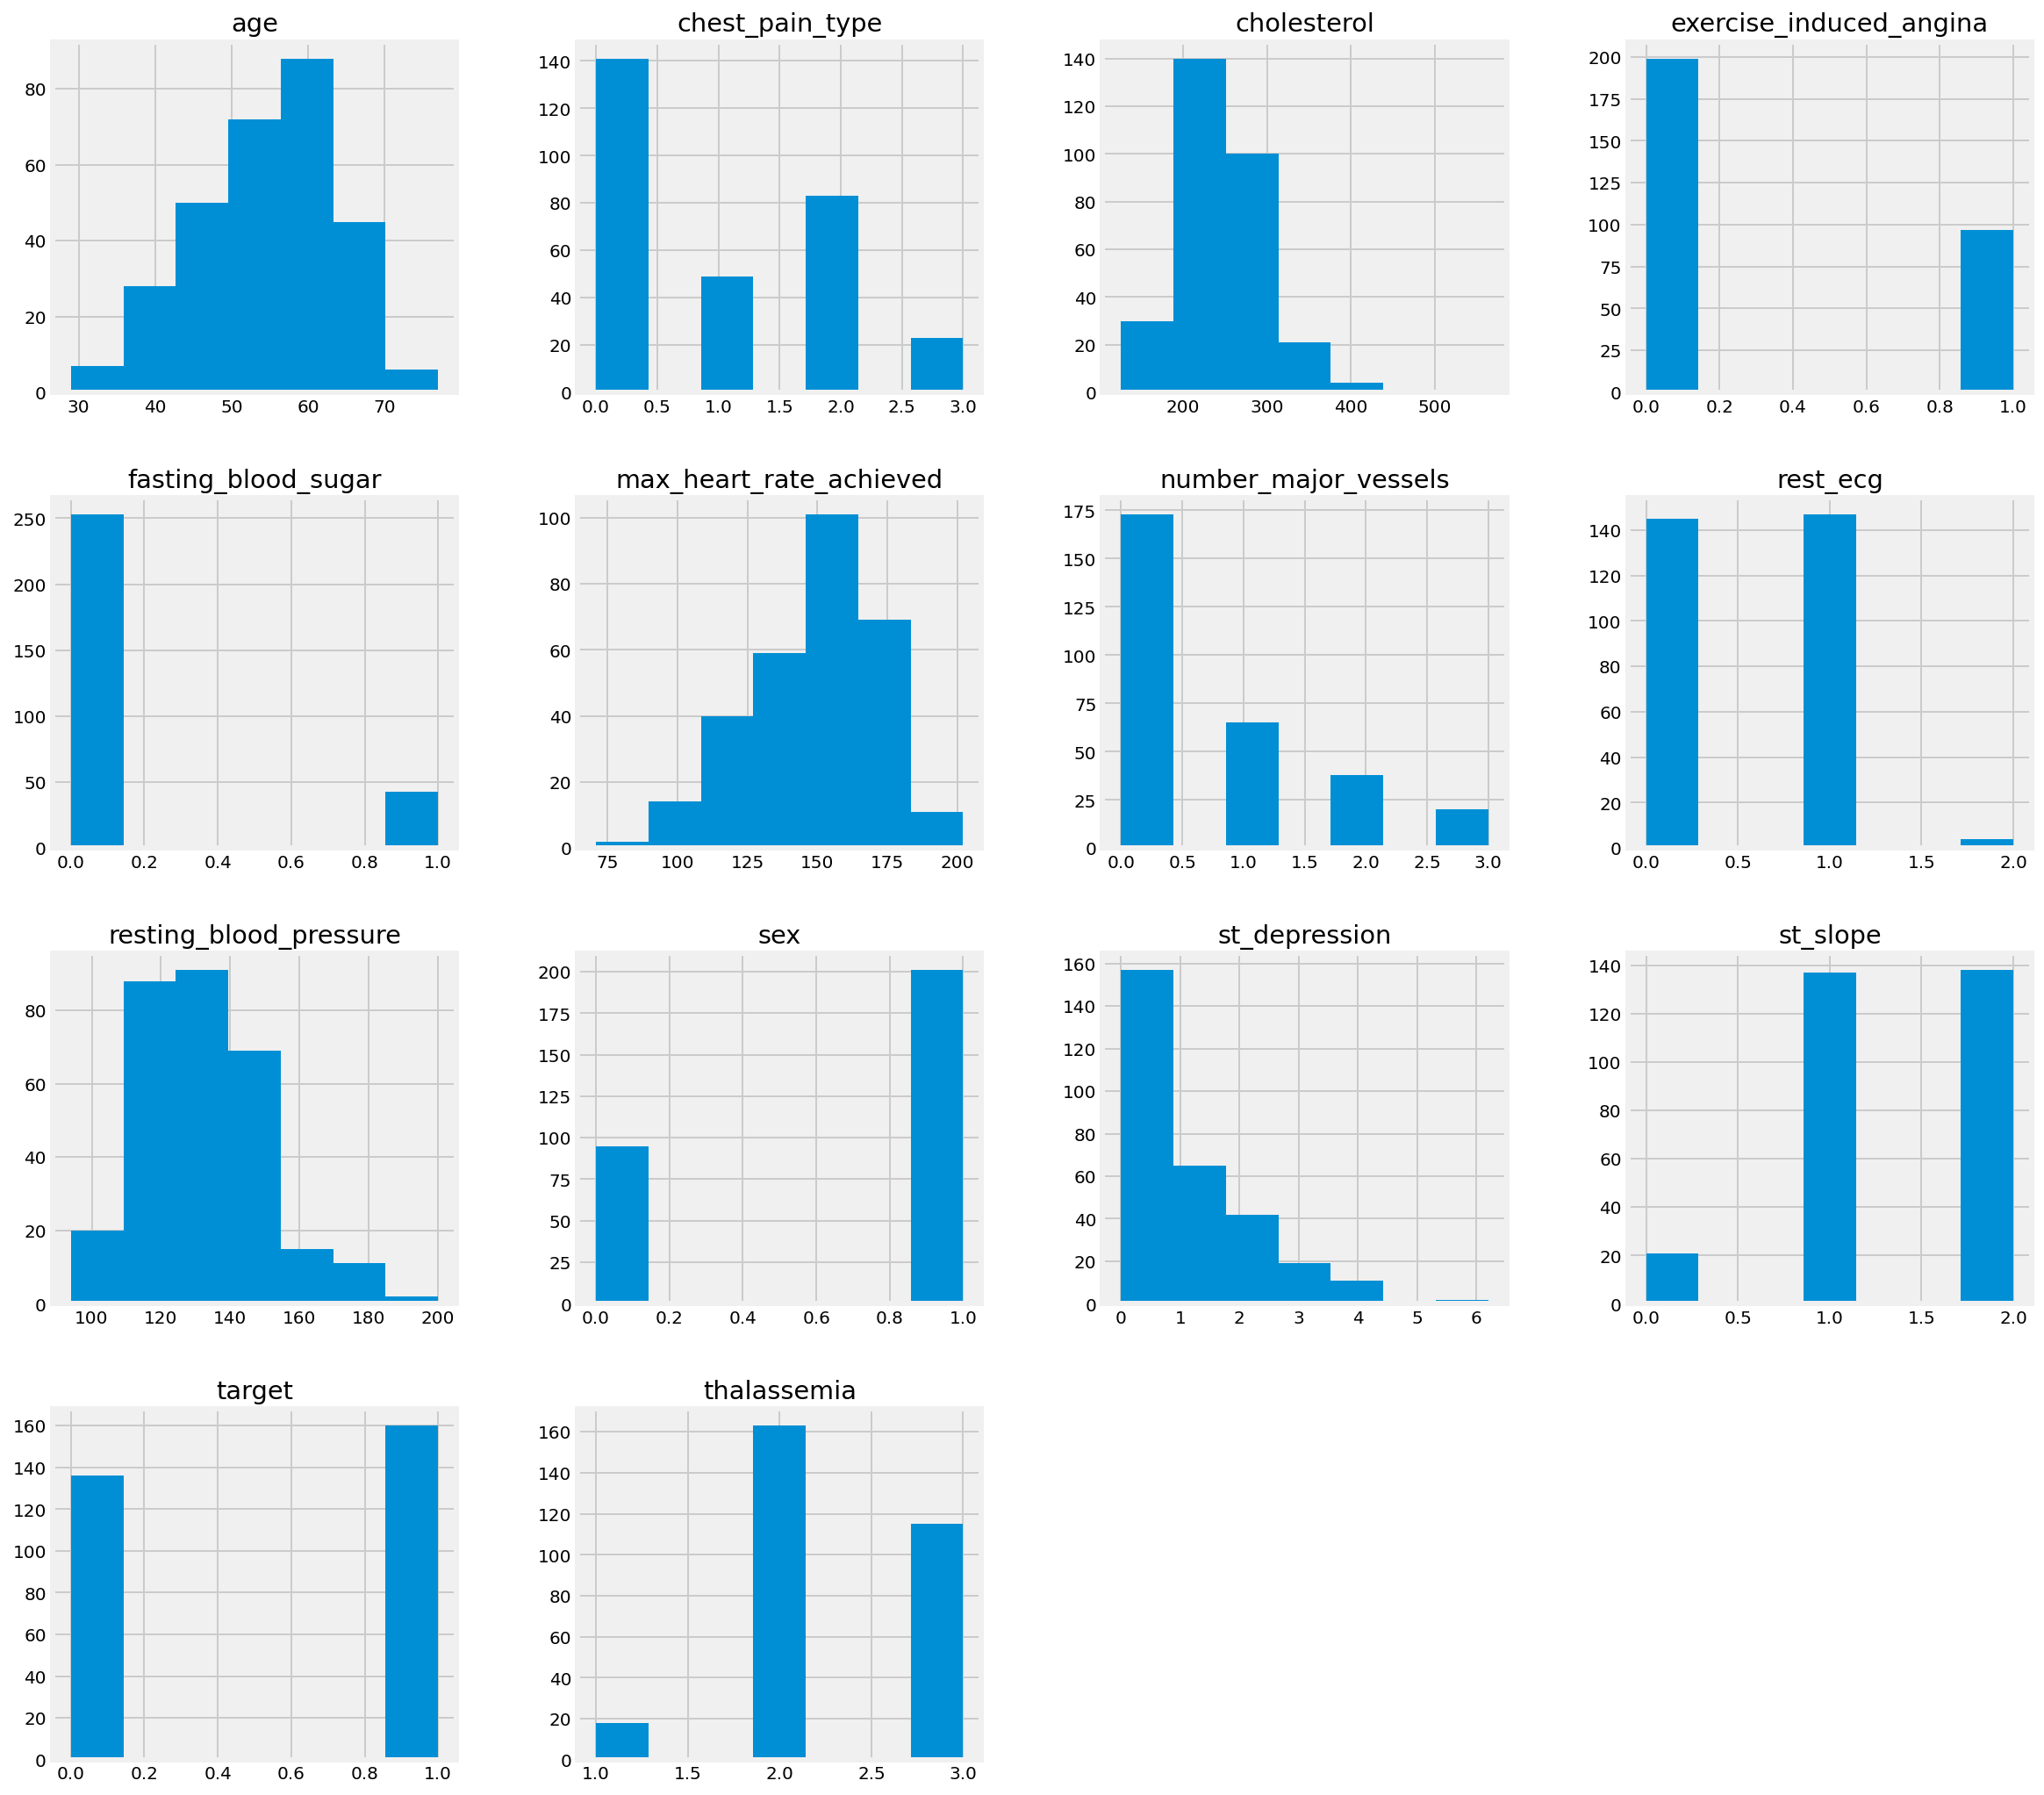

In [18]:
HD.hist(figsize=(18,18), bins=7);


2- See the correlation matrix using heat map.

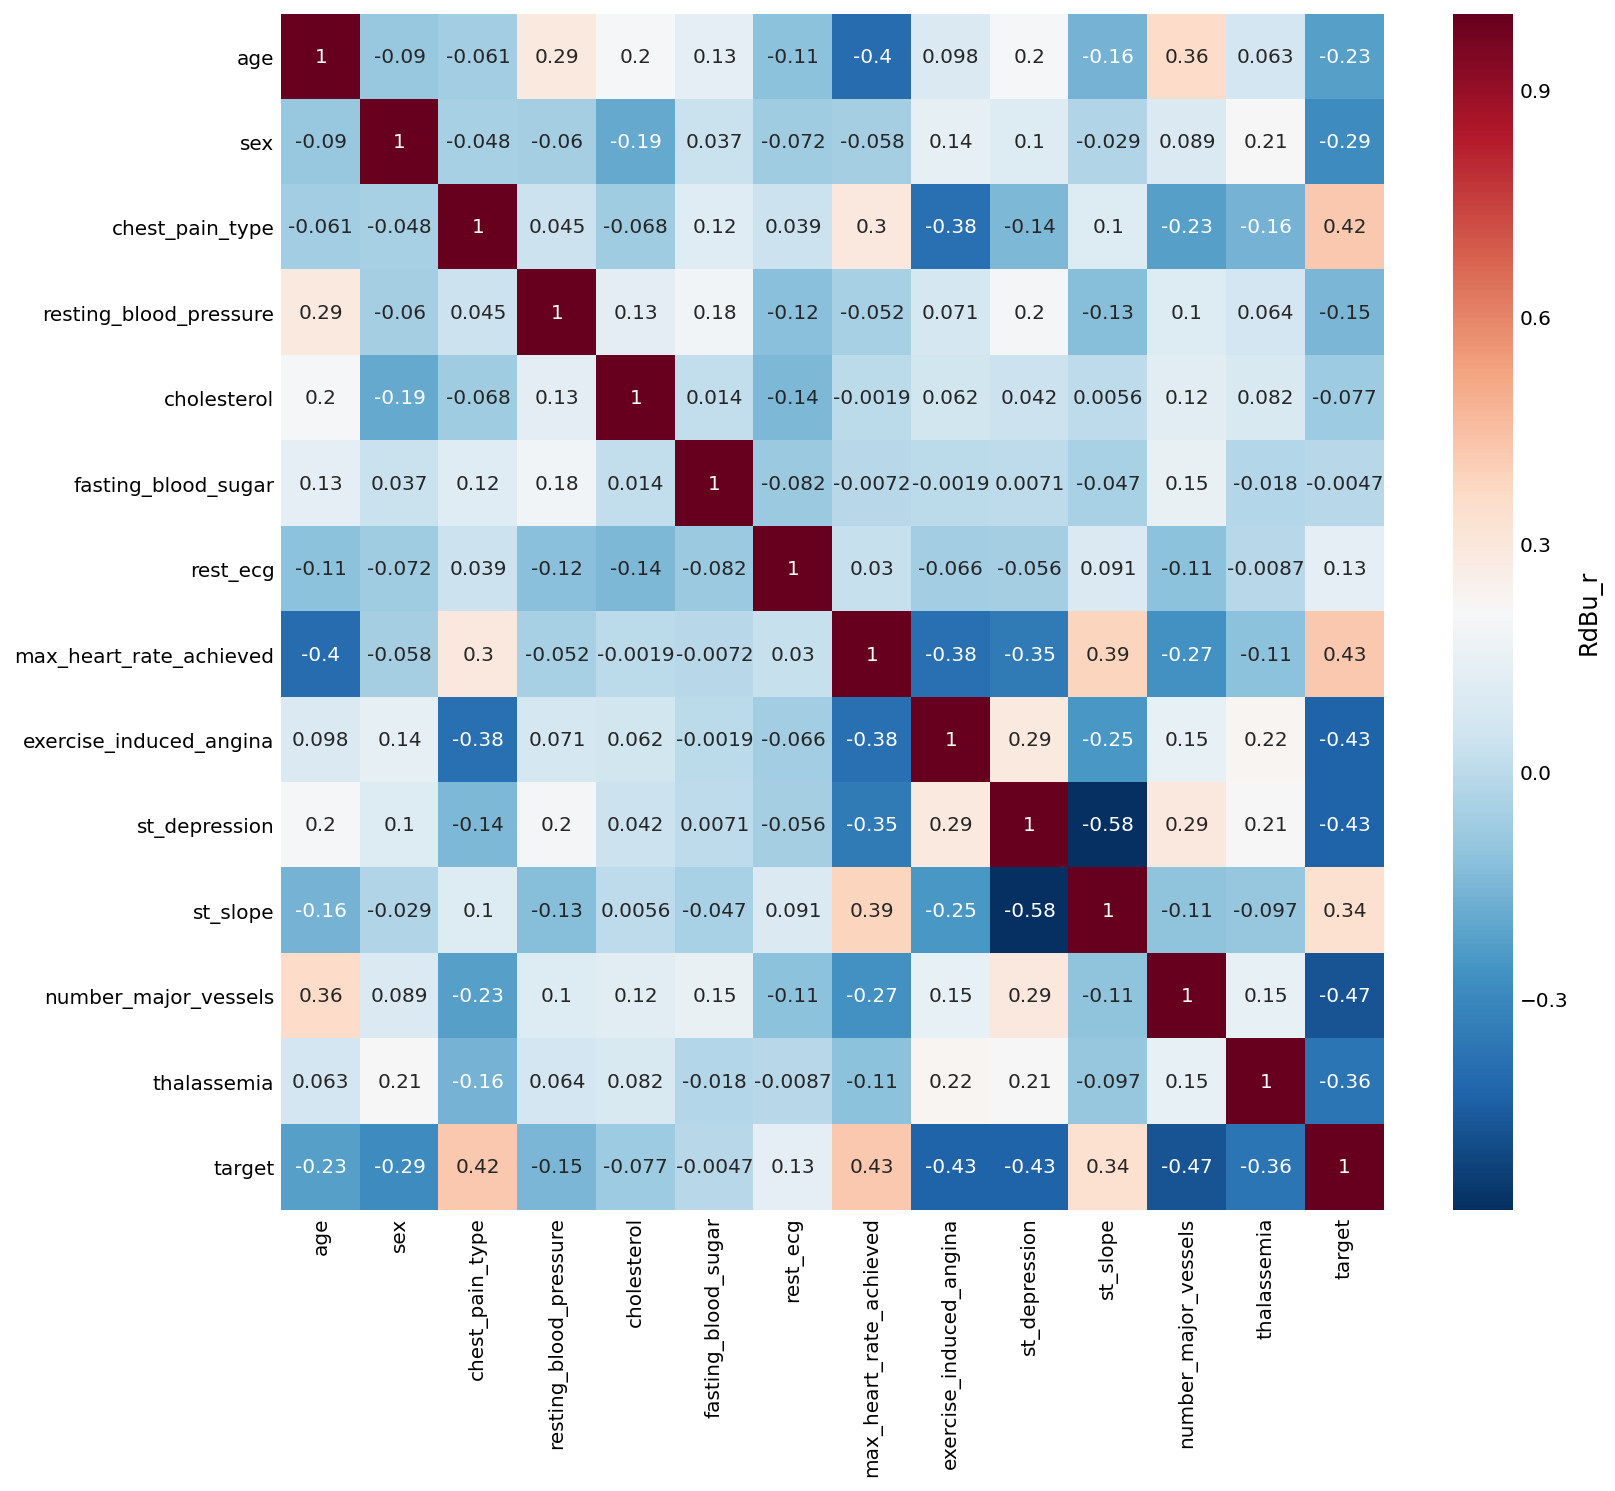

In [19]:
fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(HD.corr(),cmap="RdBu_r",annot=True,ax=ax,cbar_kws={'label': 'RdBu_r'})
plt.show()

2- See the pair plot for all data set with our target.

In [ ]:

sns.pairplot(HD, hue = 'target', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

C:\Users\sony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


See the age rang for persons in our data set. 

In [ ]:
sns.distplot(HD['age'], color = 'red' , hist_kws={'edgecolor':'black', "color":'blue' });
plt.title('Histogram of Age distribution');
plt.xlabel('Age ');


Show the how have heart disease and gender.

In [ ]:
sns.catplot(x='target', y='age', hue='sex', data=HD, kind='bar');

See the distribution of ages in our dataset and spcify the gender. 

In [ ]:
plt.hist(list(HD[HD['sex']==1]['age']), 
            ec = 'black', color='blue', label='male')
plt.hist(list(HD[HD['sex']==0]['age']), 
            ec = 'black' ,color="r", label='female')
plt.legend()
plt.ylabel('Frequency'), plt.xlabel('Age');

Show the ages distribution of males sex=0 and females sex=1 and how have heart disease target =1 and how havent heart disease target =0.

In [ ]:
g = sns.FacetGrid(HD, row='sex', col='target')
g.map(sns.distplot, "age")
plt.show()


Show distribution of age with blood_pressure

In [ ]:

sns.jointplot(data=HD, x='age', y='resting_blood_pressure', kind='reg', color='r')
plt.show()

In [ ]:
#sns.distplot(HD['fasting_blood_sugar'], hist=False, rug=True)

sns.distplot(HD['max_heart_rate_achieved'], hist=False, rug=True)

In [ ]:
 sns.distplot(HD['cholesterol'], hist=False,rug=True, kde_kws={'shade':True})
